In [1]:
import pandas as pd
import os
import warnings
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import re

### References for the imports
- pandas: a library for data manipulation and analysis. Reference: https://pandas.pydata.org/
- os: a library for interacting with the operating system. Reference: https://docs.python.org/3/library/os.html
- warnings: a library for issuing warnings to the user. Reference: https://docs.python.org/3/library/warnings.html
- glob: a library for finding all pathnames matching a specified pattern according to the rules used by the Unix shell. Reference: https://docs.python.org/3/library/glob.html
- matplotlib.pyplot: a plotting library for creating visualizations in Python. Reference: https://matplotlib.org/stable/api/pyplot_summary.html
- seaborn: a data visualization library based on matplotlib that provides additional functionality and improved aesthetics. Reference: https://seaborn.pydata.org/
- sklearn.model_selection.train_test_split: a function from scikit-learn that splits arrays or matrices into random train and test subsets. Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- tensorflow: an open-source machine learning framework developed by Google. Reference: https://www.tensorflow.org/
- tensorflow_hub: a library for publishing, discovering, and consuming pre-trained models as reusable modules in TensorFlow. Reference: https://www.tensorflow.org/hub/
- keras: an open-source neural network library written in Python that runs on top of TensorFlow. Reference: https://keras.io/
- joblib.dump: a function from joblib that allows you to save Python objects such as models to disk using efficient binary - serialization. Reference: https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html
- sklearn.metrics: a module from scikit-learn that contains various metrics to evaluate model performance. Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
- re: a module that provides regular expression matching operations in Python. Reference: https://docs.python.org/3/library/re.html

In [2]:
# code to avoid depricated code warnings due to df.append()
# reference : https://stackoverflow.com/questions/879173/how-to-ignore-deprecation-warnings-in-python

def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [3]:
# visualizing the tsv files
df1=pd.read_csv("train/boxes_transcripts_labels/0b55f878-9dc7-478b-9bba-342056684452_document-5_page-1.tsv")
df1

,0,0.1,430,288,453,326,1,OTHER
0,6,11,522,288,667,326,"Wages,",OTHER
1,13,17,679,288,764,326,"tips,",OTHER
2,19,23,776,288,880,326,other,OTHER
3,25,29,891,288,1014,326,comp.,OTHER
4,46,46,1272,288,1295,326,2,OTHER
...,...,...,...,...,...,...,...,...
174,2430,2435,665,3003,810,3042,income,OTHER
175,2437,2439,822,3003,882,3042,tax,OTHER
176,2463,2464,1272,3003,1318,3042,20,OTHER
177,2471,2478,1376,3003,1533,3042,Locality,OTHER


In [4]:
len(df1)

179

In [5]:
path2="train/boxes_transcripts_labels/0b55f878-9dc7-478b-9bba-342056684452_document-8_page-1.tsv"
d2=pd.read_csv(path2)

In [6]:
d2

,0,0.1,430,288,453,326,1,OTHER
0,6,11,522,288,667,326,"Wages,",OTHER
1,13,17,679,288,764,326,"tips,",OTHER
2,19,23,776,288,880,326,other,OTHER
3,25,29,891,288,1014,326,comp.,OTHER
4,46,46,1272,288,1295,326,2,OTHER
...,...,...,...,...,...,...,...,...
173,2433,2438,665,3003,810,3042,income,OTHER
174,2440,2442,822,3003,882,3042,tax,OTHER
175,2466,2467,1272,3003,1318,3042,20,OTHER
176,2474,2481,1376,3003,1533,3042,Locality,OTHER


In [7]:
df3=df1.append(d2)

In [8]:
df3

,0,0.1,430,288,453,326,1,OTHER
0,6,11,522,288,667,326,"Wages,",OTHER
1,13,17,679,288,764,326,"tips,",OTHER
2,19,23,776,288,880,326,other,OTHER
3,25,29,891,288,1014,326,comp.,OTHER
4,46,46,1272,288,1295,326,2,OTHER
...,...,...,...,...,...,...,...,...
173,2433,2438,665,3003,810,3042,income,OTHER
174,2440,2442,822,3003,882,3042,tax,OTHER
175,2466,2467,1272,3003,1318,3042,20,OTHER
176,2474,2481,1376,3003,1533,3042,Locality,OTHER


In [9]:
# Merging all the tsv files in one dataframe

#column names for  DataFrame
columns = ["start_index", "end_index", "x_top_left", "y_top_left", "x_bottom_right", "y_bottom_right", "transcript", "field"]

# Get a list of all file paths that match a specific pattern (In this case, all files ending with .tsv)
file_paths = glob.glob("train/boxes_transcripts_labels/*.tsv")  

# Create an empty list to store the DataFrames
dfs = []

# Iterate over the file paths
for file_path in file_paths:
    # Read the data from the file into a DataFrame
    data = pd.read_csv(file_path, header=None, names=columns)  # Assuming CSV files and no header row
    
    # Append the DataFrame to the list
    dfs.append(data)

# Concatenate all the DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Print the merged DataFrame
print(merged_df)

        start_index  end_index  x_top_left  y_top_left  x_bottom_right  \
0                33         33         215           4             227   
1                35         44         235           3             308   
2                46         51         311           3             349   
3                53         60         352           3             401   
4                62         67         404           3             457   
...             ...        ...         ...         ...             ...   
237611         2325       2327         365        1064             385   
237612         2329       2334         388        1064             429   
237613         2336       2338         451        1063             482   
237614         2340       2342         485        1063             509   
237615         2344       2352         511        1063             572   

        y_bottom_right  transcript  field  
0                   21           a  OTHER  
1                   21 

# Exploratory Data Analysis


#### Exploring the value counts 
 - Looking at the value counts, it is clear that the dataset is imbalanced for classification. 
 - The number of rows having field = OTHER is a lot more than other classes

In [10]:
merged_df['field'].value_counts()

OTHER                                 222548
employerAddressStreet_name              2260
employerName                            1954
employeeName                            1123
box2FederalIncomeTaxWithheld            1106
box1WagesTipsAndOtherCompensations      1043
box16StateWagesTips                     1043
box17StateIncomeTax                     1023
box4SocialSecurityTaxWithheld           1009
box3SocialSecurityWages                  979
employerAddressCity                      840
employerAddressZip                       572
employerAddressState                     552
taxYear                                  546
einEmployerIdentificationNumber          542
ssnOfEmployee                            476
Name: field, dtype: int64

In [11]:
# check the shape
merged_df.shape 

(237616, 8)

#### Exploring if there are any null values

In [12]:
merged_df.isna().sum()

start_index        0
end_index          0
x_top_left         0
y_top_left         0
x_bottom_right     0
y_bottom_right     0
transcript        58
field              0
dtype: int64

- Transcript contains some null values.
- Lets remove those null values

In [13]:
merged_df=merged_df.dropna()
merged_df.isna().sum()

start_index       0
end_index         0
x_top_left        0
y_top_left        0
x_bottom_right    0
y_bottom_right    0
transcript        0
field             0
dtype: int64

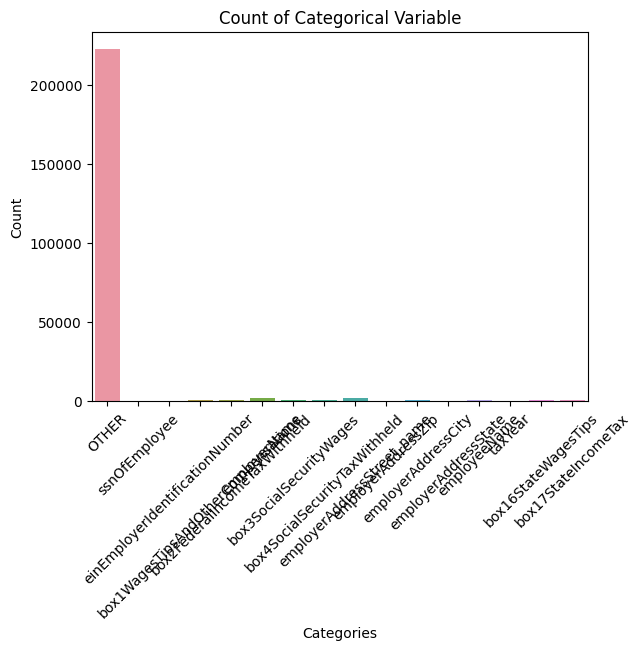

In [14]:
# Creating a count plot using Seaborn to visualize the distribution of values in the 'field' column of the 'merged_df' DataFrame.
sns.countplot(x='field', data=merged_df)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categorical Variable')
plt.xticks(rotation=45)
plt.show()

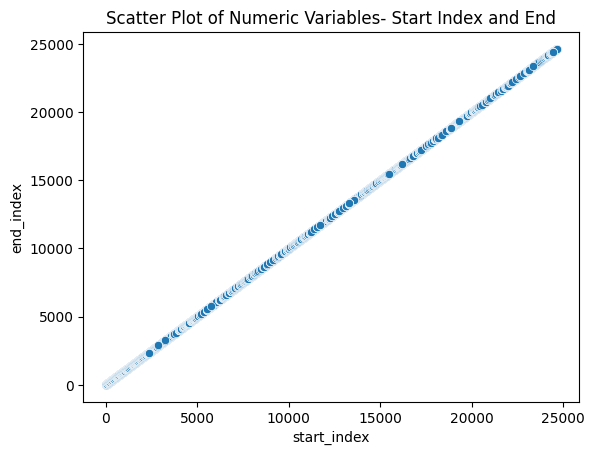

In [15]:
# Create a scatter plot using Seaborn to visualize the relationship between the 'start_index' and 'end_index' columns of the 'merged_df' DataFrame.
sns.scatterplot(x='start_index', y='end_index', data=merged_df)
plt.xlabel('start_index')
plt.ylabel('end_index')
plt.title('Scatter Plot of Numeric Variables- Start Index and End')
plt.show()

In [ ]:
# Since the x_top_left, y_top_left, x_bottom_right, y_bottom_right are the coordinates of the boxes,
# I'll assume that they wont have any outliers, since they are the points within the image dimensions.

In [17]:
# checking the datatypes
merged_df.dtypes

start_index        int64
end_index          int64
x_top_left         int64
y_top_left         int64
x_bottom_right     int64
y_bottom_right     int64
transcript        object
field             object
dtype: object

#### Analaysis for model building

- The transcript of the OCR contains the following classes to be extracted:
1. employerName
2. employerAddressStreet_name
3. employerAddressCity
4. employerAddressState
5. employerAddressZip
6. einEmployerIdentificationNumber
7. employeeName
8. ssnOfEmployee
9. box1WagesTipsAndOtherCompensations
10. box2FederalIncomeTaxWithheld
11. box3SocialSecurityWages
12. box4SocialSecurityTaxWithheld
13. box16StateWagesTips
14. box17StateIncomeTax
15. taxYear

Out of which, some classes have numerical values , some have Natural languges and some are of the form numbers separated by '-' (eg:234-423-241)

- Natural language (strings):

1. employerName: This is a natural language class since it represents the name of the employer.
2. employerAddressStreet_name: This class is also a natural language variable as it represents the street name of the employer's address.
3. employerAddressCity: This is a natural language class representing the city name in the employer's address.
4. employerAddressState: Similarly, this class represents the state name in the employer's address.
7. employeeName: This class is a natural language variable as it represents the name of the employee.

- Numerical classes (int, float):
9. box1WagesTipsAndOtherCompensations: This class is numerical and represents the wages, tips, and other compensations.
10. box2FederalIncomeTaxWithheld: This class represents the federal income tax withheld and is numerical.
11. box3SocialSecurityWages: This class is numerical and represents the Social Security wages.
12. box4SocialSecurityTaxWithheld: Similarly, this class represents the Social Security tax withheld and is numerical.
13. box16StateWagesTips: This class is numerical and represents the state wages and tips.
14. box17StateIncomeTax: This class represents the state income tax and is numerical.
15. taxYear: This class represents the tax year and is likely numerical, such as 2021 or 2022.

- variables of type numbers separated by '-'
5. employerAddressZip: This class, denoting the zip code of the employer's address, can be treated as a categorical variable since it represents distinct categories or locations. (72478-8329)
6. einEmployerIdentificationNumber : numerical value that represents employer ID (14-4342619)
8. ssnOfEmployee: This class represents the Social Security Number of the employee which is numerical. (720-74-9502)



## Modelling and prediction Approach
- My approach is to create separate datasets and models to take into account all the types of data,
    1. A model to predict Natural Language Classes
    2. A model to predict numerical classes
    3. An algorithm to detect (num-num) type classes using regular expressions
- Then creating a funtion to combine all these three models to perform line-by-line predictions in the tsv files.


In [18]:
merged_df

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,33,33,215,4,227,21,a,OTHER
1,35,44,235,3,308,21,Employee's,OTHER
2,46,51,311,3,349,20,social,OTHER
3,53,60,352,3,401,20,security,OTHER
4,62,67,404,3,457,21,number,OTHER
...,...,...,...,...,...,...,...,...
237611,2325,2327,365,1064,385,1079,Tax,OTHER
237612,2329,2334,388,1064,429,1079,Return,OTHER
237613,2336,2338,451,1063,482,1078,OMB,OTHER
237614,2340,2342,485,1063,509,1078,No.,OTHER


- Lets create two different dataframes 
1. Train_df_NL: One that will consist of field values which are natural language
2. Train_df_NU: Another dataframe which consists of numerical values

- Grouping the rows based on the various classes in the field column

In [19]:
grouped=merged_df.groupby(merged_df.field)

In [20]:
# creating a datset for the Natural Language Model

df_1=grouped.get_group("employerName").head(1000)
df_2=grouped.get_group("employerAddressStreet_name").head(1000)
df_3=grouped.get_group("employerAddressCity")
df_4=grouped.get_group("employerAddressState")
df_5=grouped.get_group("employeeName")

train_df_NL=pd.concat([df_1,df_2,df_3,df_4,df_5])

train_df_NL

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
53,770,785,67,132,289,153,Collins-Saunders,employerName
54,787,789,303,131,347,153,and,employerName
55,791,794,359,131,416,153,Sons,employerName
600,2342,2344,303,240,349,267,and,employerName
601,2346,2349,359,231,419,260,Sons,employerName
...,...,...,...,...,...,...,...,...
237124,2177,2185,326,748,426,772,Cervantes,employeeName
237333,1914,1918,151,727,206,747,Debra,employeeName
237334,1932,1937,261,734,327,753,Garcia,employeeName
237544,1592,1598,133,722,211,738,Charles,employeeName


In [21]:
#checking the value counts for each class
train_df_NL['field'].value_counts()

employeeName                  1123
employerName                  1000
employerAddressStreet_name    1000
employerAddressCity            840
employerAddressState           552
Name: field, dtype: int64

In [22]:
# variables of type num-num...

df_15=grouped.get_group('employerAddressZip')
df_16=grouped.get_group('einEmployerIdentificationNumber')
df_17=grouped.get_group('ssnOfEmployee')


- Creating dataset for the numerical classes

In [23]:

df_8=grouped.get_group("box1WagesTipsAndOtherCompensations")
df_9=grouped.get_group("box2FederalIncomeTaxWithheld")
df_10=grouped.get_group("box3SocialSecurityWages")
df_11=grouped.get_group("box4SocialSecurityTaxWithheld")
df_12=grouped.get_group("box16StateWagesTips")
df_13=grouped.get_group("box17StateIncomeTax")
df_14=grouped.get_group("taxYear")

train_df_NU=pd.concat([df_8,df_9,df_10,df_11,df_12,df_13,df_14],ignore_index=True)
train_df_NU

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,557,562,726,78,805,99,41669.,box1WagesTipsAndOtherCompensations
1,564,565,809,78,835,100,07,box1WagesTipsAndOtherCompensations
2,1145,1149,730,131,798,157,80470,box1WagesTipsAndOtherCompensations
3,1151,1151,801,130,812,150,.,box1WagesTipsAndOtherCompensations
4,1153,1154,813,128,835,149,88,box1WagesTipsAndOtherCompensations
...,...,...,...,...,...,...,...,...
6744,2276,2279,459,1022,538,1054,2018,taxYear
6745,2855,2858,461,1058,542,1096,2018,taxYear
6746,3035,3038,546,1032,627,1070,2018,taxYear
6747,2738,2741,462,1045,542,1080,2018,taxYear


In [24]:
#checking the value counts for the numerical dataset
train_df_NU['field'].value_counts()

box2FederalIncomeTaxWithheld          1106
box1WagesTipsAndOtherCompensations    1043
box16StateWagesTips                   1043
box17StateIncomeTax                   1023
box4SocialSecurityTaxWithheld         1009
box3SocialSecurityWages                979
taxYear                                546
Name: field, dtype: int64

### Note:
- OTHER is also a class to be predicted 
- OTHER consists of both numerical as well as natural language values.
- Hence I'll combine numerical part to the numerical dataset and NL part to the NL dataset.
- Finally the dataframes will be : 
    - num_dataframe : (numerical classes + OTHER having numerical transcripts) 
    - NL dataframe : (NL classes + OTHER having NL transcripts)

In [25]:
df_other=grouped.get_group('OTHER')
df_other


,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,33,33,215,4,227,21,a,OTHER
1,35,44,235,3,308,21,Employee's,OTHER
2,46,51,311,3,349,20,social,OTHER
3,53,60,352,3,401,20,security,OTHER
4,62,67,404,3,457,21,number,OTHER
...,...,...,...,...,...,...,...,...
237611,2325,2327,365,1064,385,1079,Tax,OTHER
237612,2329,2334,388,1064,429,1079,Return,OTHER
237613,2336,2338,451,1063,482,1078,OMB,OTHER
237614,2340,2342,485,1063,509,1078,No.,OTHER


In [26]:
# creating a dataframe of OTHER having numerical values (max rows are set to 2000 as the final dataset needs to be balanced)
count=0
df_other_nu = pd.DataFrame()
for index, row in df_other.iterrows():
    if str(row['transcript']).isnumeric():
        df_other_nu = df_other_nu.append(row)
        count+=1
        print(index)
    if count>2000:
        break

66
71
76
78
88
89
91
95
99
100
110
118
121
123
124
130
138
143
147
151
152
164
169
173
178
182
188
189
191
192
194
196
202
204
205
207
312
313
314
315
323
333
334
336
340
341
346
353
354
355
356
358
361
362
366
368
372
376
377
387
395
398
400
401
406
407
411
416
427
429
434
447
451
456
459
469
471
476
477
478
481
483
490
587
589
593
613
616
618
620
626
628
632
636
638
639
642


648
656
660
663
665
670
673
676
682
687
689
690
694
696
699
704
706
707
709
711
723
725
728
833
835
868
874
878
886
888
892
896
897
898
901
904
911
914
922
923
928
931
934
943
945
948
950
953
961
963
964
977
979
981
983
997
1024
1105
1109
1113
1115
1122
1124
1132
1135
1140
1143
1144
1150
1152
1155
1160
1164
1168
1169
1171
1183
1186
1192
1194
1195
1200
1201
1205
1211
1212
1214
1221
1223
1224
1226
1245
1247
1342
1345
1347
1355
1357
1360
1375
1376
1377
1381
1385
1387
1393
1394
1398
1405
1408
1411
1415
1418
1421
1428
1435
1436
1441
1442
1444
1446
1454
1458
1462
1463
1467
1468
1470
1471
1472
1489
1490
1491
1581
1588
1594
1595
1597
1598
1611
1613
1617
1621
1622
1627
1630
1636
1637
1640
1647
1648
1650
1660
1663
1666
1671
1675
1676
1680
1683
1689
1697
1702
1703
1708
1710
1711
1713
1719
1721
1724
1726
1729
1731
1732
1734
1737
1834
1836
1840
1847
1851
1853
1860
1862
1863
1870
1875
1877
1878
1882
1883
1885
1886
1897
1899
1900
1904
1913
1914
1916
1919
1927
1928
1932
1939
1941
1954
1958
1959
1963
1

In [27]:
df_other_nu

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
66,987,987,680,155,693,174,5,OTHER
71,1028,1028,970,156,981,172,6,OTHER
76,1149,1153,725,181,794,203,34390,OTHER
78,1157,1158,809,182,838,203,45,OTHER
88,1449,1450,810,232,836,254,13,OTHER
...,...,...,...,...,...,...,...,...
12895,10060,10060,1276,2865,1293,2910,8,OTHER
12896,10083,10088,1476,2867,1628,2907,256801,OTHER
12898,10092,10093,1660,2866,1709,2909,36,OTHER
12899,10122,10126,1866,2865,1989,2908,33841,OTHER


In [28]:
# creating datframe for OTHER having Natural Language Transcripts ( max rows are 2000)
count=0
df_other_nl = pd.DataFrame()
for index, row in df_other.iterrows():
    if not str(row['transcript']).isnumeric():
        df_other_nl = df_other_nl.append(row)
        count+=1
        print(index)
    if count>2000:
        break

0
1
2
3
4
5
6
7
8
9
10
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
39
40
41
42
43
44
45
46
47
48
49
50
51
52
67
68
69
70
72
73
74
77
79
82
83
84
85
86
87
90
92
93
94
96
97
98
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
117
122
125
126
127
128
129
131
132
133
134
135
136
137
139
140
141
142
144
145
146
148
149
150
153
154
155
156
157
158
159
160
161
162
163
165
166
167
168
170
171
172
174
175
176
177
179
180
181
183
184
185
186
187
190
193
195
197
198
199
200
201
203
206
208
209
210
211
212
213
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
316
317
318
319
320
321
322
324
325
326
327
328
329
330
331
332
335
337


In [29]:
df_other_nl

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,33,33,215,4,227,21,a,OTHER
1,35,44,235,3,308,21,Employee's,OTHER
2,46,51,311,3,349,20,social,OTHER
3,53,60,352,3,401,20,security,OTHER
4,62,67,404,3,457,21,number,OTHER
...,...,...,...,...,...,...,...,...
2619,3201,3204,197,560,227,576,code,OTHER
2620,3211,3215,29,576,62,591,State,OTHER
2621,3217,3226,87,576,153,592,Employer's,OTHER
2622,3230,3234,156,578,185,592,state,OTHER


## Creating the NLP model
- Appending the 1000 rows of OTHER(NL) to the NL dataframe

In [30]:
final_train_df_nl=train_df_NL.append(df_other_nl.head(1000))

In [31]:
final_train_df_nl

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
53,770,785,67,132,289,153,Collins-Saunders,employerName
54,787,789,303,131,347,153,and,employerName
55,791,794,359,131,416,153,Sons,employerName
600,2342,2344,303,240,349,267,and,employerName
601,2346,2349,359,231,419,260,Sons,employerName
...,...,...,...,...,...,...,...,...
1265,5855,5861,1272,808,1328,834,Service,OTHER
1266,5947,5949,551,863,575,885,Cut,OTHER
1267,5951,5955,576,867,617,890,here.,OTHER
1268,5957,5960,618,872,653,895,Keep,OTHER


In [32]:
final_train_df_nl['field'].value_counts()

employeeName                  1123
employerName                  1000
employerAddressStreet_name    1000
OTHER                         1000
employerAddressCity            840
employerAddressState           552
Name: field, dtype: int64

In [33]:
# lets shuffle the NL dataframe
train_df_nl_shuffled=final_train_df_nl.sample(frac=1,random_state=42)
train_df_nl_shuffled 

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
68468,1047,1051,393,183,464,213,Suite,employerAddressStreet_name
181158,2121,2127,158,358,273,382,Michael,employeeName
213,4149,4151,264,685,304,707,Tax,OTHER
193503,2043,2053,118,328,243,352,Isaiahmouth,employerAddressCity
182848,929,935,87,360,200,394,Anthony,employeeName
...,...,...,...,...,...,...,...,...
82925,2046,2054,116,363,262,406,Catherine,employeeName
848,8998,9000,922,1069,942,1092,and,OTHER
887,10432,10436,772,1240,805,1260,Suff.,OTHER
1107,1730,1732,1200,265,1221,285,tax,OTHER


In [34]:
# creating a label column for class values
train_df_nl_shuffled['label']=pd.Categorical(train_df_nl_shuffled["field"]).codes
train_df_nl_shuffled 

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field,label
68468,1047,1051,393,183,464,213,Suite,employerAddressStreet_name,4
181158,2121,2127,158,358,273,382,Michael,employeeName,1
213,4149,4151,264,685,304,707,Tax,OTHER,0
193503,2043,2053,118,328,243,352,Isaiahmouth,employerAddressCity,2
182848,929,935,87,360,200,394,Anthony,employeeName,1
...,...,...,...,...,...,...,...,...,...
82925,2046,2054,116,363,262,406,Catherine,employeeName,1
848,8998,9000,922,1069,942,1092,and,OTHER,0
887,10432,10436,772,1240,805,1260,Suff.,OTHER,0
1107,1730,1732,1200,265,1221,285,tax,OTHER,0


In [35]:
# looking at the classes and their corresponding labels
for i in range(6):
  print(f"{pd.Categorical(train_df_nl_shuffled['field']).categories[i]} => {i}")

OTHER => 0
employeeName => 1
employerAddressCity => 2
employerAddressState => 3
employerAddressStreet_name => 4
employerName => 5


In [36]:
# making a class_names lists for predictions
class_names_nl=[]
for i in range(6):
    class_names_nl.append(pd.Categorical(train_df_nl_shuffled['field']).categories[i])
class_names_nl

['OTHER',
 'employeeName',
 'employerAddressCity',
 'employerAddressState',
 'employerAddressStreet_name',
 'employerName']

In [37]:
# splitting the data for training and validation sets
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_nl_shuffled["transcript"].to_numpy(),
                                                                       train_df_nl_shuffled["label"].to_numpy(),
                                                                       random_state=42,
                                                                       test_size=0.1 )

In [38]:
# check the lengths
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(4963, 552, 4963, 552)

In [39]:
train_sentences,train_labels

(array(['Copy', 'Suite', 'Christopher', ..., 'Group', 'required', 'CA'],
       dtype=object),
 array([0, 4, 1, ..., 5, 0, 3], dtype=int8))

- Model using the TensorFLow-Hub universal sentence encoder

In [40]:
# using the tf-hub-universal-sentence-encoder
#create keras layer using USE  pretrained layer from tensorflow hub
# Reference: https://www.tensorflow.org/hub/

sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[], # documentation says input layer can be english text of any variable length hence kept empty
                                      dtype=tf.string,
                                      name="USE"
                                      )

In [41]:
#CREATE MODEL USING Keras SEQUENTIAL API 

model_1=tf.keras.Sequential([
    
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(6,activation="softmax")

],name="model_1_USE")

#COMPILE THE MODEL
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_1=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels)
                            )

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/5
156/156 [==============================] - 10s 21ms/step - loss: 1.4154 - accuracy: 0.4862 - val_loss: 0.9807 - val_accuracy: 0.7101
Epoch 2/5
156/156 [==============================] - 2s 12ms/step - loss: 0.9316 - accuracy: 0.6855 - val_loss: 0.7604 - val_accuracy: 0.7283
Epoch 3/5
156/156 [==============================] - 2s 13ms/step - loss: 0.8150 - accuracy: 0.7155 - val_loss: 0.7162 - val_accuracy: 0.7409
Epoch 4/5
156/156 [==============================] - 2s 12ms/step - loss: 0.7530 - accuracy: 0.7326 - val_loss: 0.7103 - val_accuracy: 0.7428
Epoch 5/5
156/156 [==============================] - 2s 12ms/step - loss: 0.7244 - accuracy: 0.7364 - val_loss: 0.7089 - val_accuracy: 0.7373


In [42]:
model_1_pred_prob=model_1.predict(val_sentences,verbose=0)
model_1_pred_prob=tf.squeeze(tf.round(model_1_pred_prob))
model_1_pred_prob

<tf.Tensor: shape=(552, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [43]:
# sample custom prediction
p1=model_1.predict(['Harry'],verbose=0)
p=tf.squeeze(tf.round(p1)).numpy().argmax()

In [44]:
class_names_nl[p]

'employeeName'

In [45]:
# model_1.save("nl_model_1.h5")

## Model for Numerical Values

In [46]:
train_df_NU

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
0,557,562,726,78,805,99,41669.,box1WagesTipsAndOtherCompensations
1,564,565,809,78,835,100,07,box1WagesTipsAndOtherCompensations
2,1145,1149,730,131,798,157,80470,box1WagesTipsAndOtherCompensations
3,1151,1151,801,130,812,150,.,box1WagesTipsAndOtherCompensations
4,1153,1154,813,128,835,149,88,box1WagesTipsAndOtherCompensations
...,...,...,...,...,...,...,...,...
6744,2276,2279,459,1022,538,1054,2018,taxYear
6745,2855,2858,461,1058,542,1096,2018,taxYear
6746,3035,3038,546,1032,627,1070,2018,taxYear
6747,2738,2741,462,1045,542,1080,2018,taxYear


In [47]:
train_df_NU.dtypes

start_index        int64
end_index          int64
x_top_left         int64
y_top_left         int64
x_bottom_right     int64
y_bottom_right     int64
transcript        object
field             object
dtype: object

In [48]:
# converting the transcript column to float64
mask = train_df_NU['transcript'].apply(lambda x: x.isnumeric())

train_df_NU=train_df_NU[mask]
# for index, row in train_df_NU.iterrows():
#     if str(row['transcript']).isnumeric():


# for 
train_df_NU

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
1,564,565,809,78,835,100,07,box1WagesTipsAndOtherCompensations
2,1145,1149,730,131,798,157,80470,box1WagesTipsAndOtherCompensations
4,1153,1154,813,128,835,149,88,box1WagesTipsAndOtherCompensations
5,915,920,884,153,968,182,144945,box1WagesTipsAndOtherCompensations
7,924,925,981,163,1009,186,07,box1WagesTipsAndOtherCompensations
...,...,...,...,...,...,...,...,...
6744,2276,2279,459,1022,538,1054,2018,taxYear
6745,2855,2858,461,1058,542,1096,2018,taxYear
6746,3035,3038,546,1032,627,1070,2018,taxYear
6747,2738,2741,462,1045,542,1080,2018,taxYear


In [49]:
train_df_NU["transcript"]=train_df_NU["transcript"].astype("float64")
train_df_NU.dtypes

start_index         int64
end_index           int64
x_top_left          int64
y_top_left          int64
x_bottom_right      int64
y_bottom_right      int64
transcript        float64
field              object
dtype: object

In [50]:
train_df_NU["field"].value_counts()

box2FederalIncomeTaxWithheld          604
box16StateWagesTips                   571
taxYear                               546
box1WagesTipsAndOtherCompensations    545
box17StateIncomeTax                   536
box4SocialSecurityTaxWithheld         519
box3SocialSecurityWages               483
Name: field, dtype: int64

In [51]:
# concatenating 500  rows from the OTHER dataset having numerical values
final_train_df_nu=train_df_NU.append(df_other_nu.head(500))
final_train_df_nu['transcript']=final_train_df_nu['transcript'].astype("float64")
final_train_df_nu


,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
1,564,565,809,78,835,100,7.0,box1WagesTipsAndOtherCompensations
2,1145,1149,730,131,798,157,80470.0,box1WagesTipsAndOtherCompensations
4,1153,1154,813,128,835,149,88.0,box1WagesTipsAndOtherCompensations
5,915,920,884,153,968,182,144945.0,box1WagesTipsAndOtherCompensations
7,924,925,981,163,1009,186,7.0,box1WagesTipsAndOtherCompensations
...,...,...,...,...,...,...,...,...
3104,1772,1772,398,741,412,764,3.0,OTHER
3108,1811,1812,68,813,84,828,15.0,OTHER
3109,1814,1814,87,813,97,828,0.0,OTHER
3112,1824,1825,193,828,214,847,24.0,OTHER


In [52]:
# shuffling the Numerical dataframe
train_df_nu_shuffled=final_train_df_nu.sample(frac=1,random_state=42)
train_df_nu_shuffled

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field
552,77,82,131,38,179,51,131815.0,box1WagesTipsAndOtherCompensations
5930,3614,3617,540,601,593,620,4185.0,box17StateIncomeTax
1534,4008,4012,562,974,609,1004,32851.0,box2FederalIncomeTaxWithheld
3701,234,238,461,124,502,142,20878.0,box4SocialSecurityTaxWithheld
1689,244,245,624,98,642,114,86.0,box2FederalIncomeTaxWithheld
...,...,...,...,...,...,...,...,...
6389,4317,4320,550,691,697,740,2019.0,taxYear
913,878,882,738,91,805,111,68715.0,box1WagesTipsAndOtherCompensations
5903,4521,4522,1251,2001,1306,2044,82.0,box17StateIncomeTax
6717,4676,4679,1140,1407,1408,1502,2019.0,taxYear


In [53]:
# creating a label column for class values
train_df_nu_shuffled['label']=pd.Categorical(train_df_nu_shuffled["field"]).codes
train_df_nu_shuffled

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right,transcript,field,label
552,77,82,131,38,179,51,131815.0,box1WagesTipsAndOtherCompensations,3
5930,3614,3617,540,601,593,620,4185.0,box17StateIncomeTax,2
1534,4008,4012,562,974,609,1004,32851.0,box2FederalIncomeTaxWithheld,4
3701,234,238,461,124,502,142,20878.0,box4SocialSecurityTaxWithheld,6
1689,244,245,624,98,642,114,86.0,box2FederalIncomeTaxWithheld,4
...,...,...,...,...,...,...,...,...,...
6389,4317,4320,550,691,697,740,2019.0,taxYear,7
913,878,882,738,91,805,111,68715.0,box1WagesTipsAndOtherCompensations,3
5903,4521,4522,1251,2001,1306,2044,82.0,box17StateIncomeTax,2
6717,4676,4679,1140,1407,1408,1502,2019.0,taxYear,7


In [54]:
# making a class_names lists for predictions
class_names_nu=[]
for i in range(8):
    class_names_nu.append(pd.Categorical(train_df_nu_shuffled['field']).categories[i])
class_names_nu

['OTHER',
 'box16StateWagesTips',
 'box17StateIncomeTax',
 'box1WagesTipsAndOtherCompensations',
 'box2FederalIncomeTaxWithheld',
 'box3SocialSecurityWages',
 'box4SocialSecurityTaxWithheld',
 'taxYear']

In [55]:
# looking at the classes and their corresponding labels
for i in range(8):
  print(f"{pd.Categorical(train_df_nu_shuffled['field']).categories[i]} => {i}")

OTHER => 0
box16StateWagesTips => 1
box17StateIncomeTax => 2
box1WagesTipsAndOtherCompensations => 3
box2FederalIncomeTaxWithheld => 4
box3SocialSecurityWages => 5
box4SocialSecurityTaxWithheld => 6
taxYear => 7


In [56]:
# creating features (X) and label (y) for training
X=train_df_nu_shuffled.drop(columns=['field','label'])
y=train_df_nu_shuffled['label']

In [57]:
# splitting the data for training and validation sets

X_train,X_test,y_train,y_test=train_test_split(X.to_numpy(),
                                                y.to_numpy(),
                                                random_state=42,
                                                test_size=0.1 )
                        

In [58]:
len(X_train),len(y_train),len(X_test),len(y_test)

(3873, 3873, 431, 431)

In [59]:
X_train,y_train

(array([[2.48000e+02, 2.53000e+02, 1.50000e+02, ..., 1.97000e+02,
         1.06000e+02, 1.22812e+05],
        [2.94000e+02, 2.94000e+02, 4.92000e+02, ..., 5.00000e+02,
         1.03000e+02, 8.00000e+00],
        [2.02800e+03, 2.02900e+03, 5.43000e+02, ..., 5.60000e+02,
         8.52000e+02, 6.40000e+01],
        ...,
        [4.63600e+03, 4.64000e+03, 7.57000e+02, ..., 8.82000e+02,
         1.29900e+03, 9.11410e+04],
        [1.29300e+03, 1.29800e+03, 1.47900e+03, ..., 1.63000e+03,
         4.65000e+02, 1.61580e+05],
        [4.43400e+03, 4.43500e+03, 2.10000e+02, ..., 2.36000e+02,
         1.00000e+03, 4.50000e+01]]),
 array([5, 6, 1, ..., 1, 5, 3], dtype=int8))

In [60]:
# using the scikit-learn's Randomforestclassifier to create a classifier model for predicting numerical classes
model = RandomForestClassifier(random_state=42, n_estimators=100,verbose=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# prediction on the test data
pred_y = model.predict(X_test)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_test, pred_y)
print("Accuracy: ", accuracy)

Accuracy:  0.962877030162413


In [62]:
pred=model.predict([[6717,4676,4679,1140,1407,1502,2012.0]])

In [63]:
class_names_nu[pred[0]]
# pred

'taxYear'

In [64]:
#saving the model
# dump(model,'nu_model_1.joblib')


## Regular Expressions for '-' separated data

##### variables of type numbers separated by '-'
- **employerAddressZip**: This class, denoting the zip code of the employer's address, can be treated as a categorical variable since it represents distinct categories or locations. (72478-8329)
- **einEmployerIdentificationNumber** : numerical value that represents employer ID (14-4342619)
- **ssnOfEmployee**: This class represents the Social Security Number of the employee which is numerical. (720-74-9502)

In [66]:
# Creating a funtion to classify the three types of regular expression types
# reference for creating regular expressions : https://www.w3schools.com/python/python_regex.asp

def check_regex_type(input_string):
    class_names_re=['employerAddressZip','einEmployerIdentificationNumber','ssnOfEmployee']
    pattern1 = r'^\d{5}-\d{4}$' # for type 72478-8329
    pattern2 = r'^\d{2}-\d{7}$' # for type 14-4342619
    pattern3 = r'^\d{3}-\d{2}-\d{4}$' # for type 720-74-9502

    if re.match(pattern1, input_string):
        return class_names_re[0]
    elif re.match(pattern2, input_string):
        return class_names_re[1]
    elif re.match(pattern3, input_string):
        return class_names_re[2]
    else:
        return False

# Example usage
input_str = "42-6279884"
result = check_regex_type(input_str)
print(result) # Output: Input string matches pattern 3

einEmployerIdentificationNumber


In [67]:
# model=tf.keras.models.load_model("nl_model_1.h5")

In [68]:
# creating a function to combine all three prediction models/algorithms 

def get_class(s,model_nl=model_1,model_nu=model,class_names_nu=class_names_nu,class_names_nl=class_names_nl):
    l=list(map(str,s.rstrip('\n').split(',')))

    if len(l)>=8:
        return "OTHER"
    
    elif check_regex_type(l[-1]):
        return check_regex_type(l[-1])
    else:
        if not l[-1].replace(".","").isnumeric():
            p1=model_nl.predict([f'{l[-1]}'],verbose=0)
            p=tf.squeeze(tf.round(p1)).numpy().argmax()
            return class_names_nl[p]
        else:
            try:
                l=list(map(float,s.split(",")))
                p=model.predict([l])
                return class_names_nu[p[0]]
            except ValueError:
                return "OTHER"
        
# get_class('420,430,698,237,983,276,42-884\n')

In [69]:
p=list(map(float,("52,58,1353,288,1500,326,200.0").split(',')))
p

[52.0, 58.0, 1353.0, 288.0, 1500.0, 326.0, 200.0]

In [70]:
# performing predictions on 50 tsv files in val_copy (predictions were taking a lot of time for 207 files)
len(os.listdir("val_copy/boxes_transcripts/"))

50

In [74]:
# performing predictions on the tsv files and appending new lines into a list lines_to_copy. This list will be then used to write new
# values to the tsv files

val_path="val_copy/boxes_transcripts/"
total=len(os.listdir(val_path))
count=1
lines_to_copy=[]
for file in os.listdir(val_path):
    try:
        # process file here
        print(f"Ongoing: File {count}")
        path=os.path.join(val_path,file)
        # print(path)
        
        new_lines=[]
        with open(path, 'r') as f1:
            lines = f1.readlines()
            
            
            for line in lines:
                s=get_class(str(line))
                new_lines.append(line.strip()+f",{s}\n")
            lines_to_copy.append(new_lines)
            f1.close()
            
        count+=1
        

    except Exception as e:
        print(f"Error processing {file}: {e}")

# print(lines_to_copy)

Ongoing: File 1
Ongoing: File 2
Ongoing: File 3
Ongoing: File 4
Ongoing: File 5
Ongoing: File 6
Ongoing: File 7
Ongoing: File 8
Ongoing: File 9
Ongoing: File 10
Ongoing: File 11
Ongoing: File 12
Ongoing: File 13
Ongoing: File 14
Ongoing: File 15
Ongoing: File 16
Ongoing: File 17
Ongoing: File 18
Ongoing: File 19
Ongoing: File 20
Ongoing: File 21
Ongoing: File 22
Ongoing: File 23
Ongoing: File 24
Ongoing: File 25
Ongoing: File 26
Ongoing: File 27
Ongoing: File 28
Ongoing: File 29
Ongoing: File 30
Ongoing: File 31
Ongoing: File 32
Ongoing: File 33
Ongoing: File 34
Ongoing: File 35
Ongoing: File 36
Ongoing: File 37
Ongoing: File 38
Ongoing: File 39
Ongoing: File 40
Ongoing: File 41
Ongoing: File 42
Ongoing: File 43
Ongoing: File 44
Ongoing: File 45
Ongoing: File 46
Ongoing: File 47
Ongoing: File 48
Ongoing: File 49
Ongoing: File 50


In [75]:
len(lines_to_copy)

50

In [76]:
len(lines_to_copy[0])

210

In [77]:
# writing all the predicted values to the files

val_path="val_copy/boxes_transcripts/"
count2=0
for file in os.listdir(val_path):
    print(f"Ongoing: File {count2}")
    path=os.path.join(val_path,file)

    with open(path, 'w') as f2:
        f2.writelines(lines_to_copy[count2])
    
    count2+=1

Ongoing: File 0
Ongoing: File 1
Ongoing: File 2
Ongoing: File 3
Ongoing: File 4
Ongoing: File 5
Ongoing: File 6
Ongoing: File 7
Ongoing: File 8
Ongoing: File 9
Ongoing: File 10
Ongoing: File 11
Ongoing: File 12
Ongoing: File 13
Ongoing: File 14
Ongoing: File 15
Ongoing: File 16
Ongoing: File 17
Ongoing: File 18
Ongoing: File 19
Ongoing: File 20
Ongoing: File 21
Ongoing: File 22
Ongoing: File 23
Ongoing: File 24
Ongoing: File 25
Ongoing: File 26
Ongoing: File 27
Ongoing: File 28
Ongoing: File 29
Ongoing: File 30
Ongoing: File 31
Ongoing: File 32
Ongoing: File 33
Ongoing: File 34
Ongoing: File 35
Ongoing: File 36
Ongoing: File 37
Ongoing: File 38
Ongoing: File 39
Ongoing: File 40
Ongoing: File 41
Ongoing: File 42
Ongoing: File 43
Ongoing: File 44
Ongoing: File 45
Ongoing: File 46
Ongoing: File 47
Ongoing: File 48
Ongoing: File 49


- After successfully performing prediction, the files were evaluated using the eval.py file provided to me and a tsv file with all the metrics was saved. There was also a small bug in the eval file :) 

In [78]:
# loading the evaluation file for further analysis

metrics_df=pd.read_csv("eval_metrics.tsv")
metrics_df

,Unnamed: 0,Precision,Recall,F1-Score,Support
0,box2FederalIncomeTaxWithheld,1.0,0.830769,0.907563,79
1,box1WagesTipsAndOtherCompensations,1.0,0.803279,0.890909,76
2,box4SocialSecurityTaxWithheld,1.0,0.762712,0.865385,74
3,box3SocialSecurityWages,1.0,0.676923,0.807339,66
4,employerName,1.0,0.741379,0.851485,161
5,employerAddressStreet_name,1.0,0.365672,0.535519,193
6,employerAddressCity,1.0,0.694915,0.820000,72
7,employerAddressState,1.0,0.851064,0.919540,47
8,employerAddressZip,1.0,0.978723,0.989247,47
9,einEmployerIdentificationNumber,1.0,1.000000,1.000000,47


### Error Analysis

- ##### After analyzing the metrics_df, its seen that most of the classes have a decent Recall and F1-score except for some like ;
    
    1. **employerAddressStreet_name**
    - After analyzing the dataset even further, I have noticed that employerAddressStreet_name consists of both numerical and natural language values.
    - Eg :
        - 783,785,644,1046,749,1107,  469 ,employerAddressStreet_name  ==> numerical
        - 787,792,784,1046,994,1107,  Andrew  ,employerAddressStreet_name ==> Natural Language
        - 794,800,1029,1046,1274,1107,    Highway ,employerAddressStreet_name ==> Natural Language
        - 802,805,1309,1046,1449,1107,    Apt.    ,employerAddressStreet_name ==> Natural Language
        - 807,809,1484,1046,1589,1107,    637 ,employerAddressStreet_name ==> numerical
        - 825,829,644,1125,819,1186,  South   ,employerAddressCity ==> Natural Language
    - This dual type of values for a single entity is affecting the predictions and the metrics scores.
    <br>
    2. **employerName & employeename**
        - Both the employeeName and employerName are seemed to be Proper Nouns. Hence the model is getting little bit confused in predicting these two classes.
        - Eg : EmployerName : Anderson , can also be a name of an Employee.
    <br>
    3. **box3SocialSecurityWages**
        - The values of box3SocialSecurityWages	are very much scattered. Some of them have a very high deviation, hence it is affecting the model predictions.
        - Eg values(from dataframe): 53826, 13 ,74643.59 , 102055 , 28 , 237569 , 24 , 106979.33 ,  414913.13 , 132853 , 66 , 38488.12 , 72 , 137852, etc.
        - Here we can clearly see that some values are two digit whereas some are 4-5 digit values.
